# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [3]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [4]:
# And an inition condition (with everything in SI units)
r_0 = 147e9 * m   
             
init = State(x = r_0, 
             y = 0 * m,
             vx = 0 * m /s,
             vy = -30330 * m /s)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,-30330.0 meter / second


In [5]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=31536000 * s)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,31536000 second


In [6]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    r = Vector(x, y)
    force = (G * m1 * m2) / (r.mag ** 2)
    
    a, b = pol2cart(- r.angle, force)
    f_g = Vector(a, b)
    return f_g

In [7]:
universal_gravitation(init, system)

<Quantity([ 3.6686486e+22 -0.0000000e+00], 'newton')>

In [8]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    

    F = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = - F.x / m2
    dvydt = F.y / m2
    
    return dxdt, dydt, dvxdt, dvydt

In [9]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-30330.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [10]:
# Finally we can run the simulation
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [11]:
results

,x,y,vx,vy
0.000000e+00,1.470000e+11,0.000000e+00,0.000000e+00,-30330.000000
4.662755e-08,1.470000e+11,-1.414214e-03,-2.864369e-10,-30330.000000
5.129030e-07,1.470000e+11,-1.555635e-02,-3.150805e-09,-30330.000000
5.175658e-06,1.470000e+11,-1.569777e-01,-3.179449e-08,-30330.000000
5.180321e-05,1.470000e+11,-1.571191e+00,-3.182313e-07,-30330.000000
5.180787e-04,1.470000e+11,-1.571333e+01,-3.182600e-06,-30330.000000
5.180834e-03,1.470000e+11,-1.571347e+02,-3.182629e-05,-30330.000000
5.180838e-02,1.470000e+11,-1.571348e+03,-3.182631e-04,-30330.000000
5.180839e-01,1.470000e+11,-1.571348e+04,-3.182632e-03,-30330.000000
5.180839e+00,1.470000e+11,-1.571348e+05,-3.182632e-02,-30330.000000


In [12]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(31536000.0, 'second')>

In [13]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(364.99999999999994, 'day')>

In [14]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, t_eval=ts)

In [15]:
details

,values
sol,None
t_events,[]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [16]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [17]:
# Scaling the distance to million km

x = results.x / 1e9;

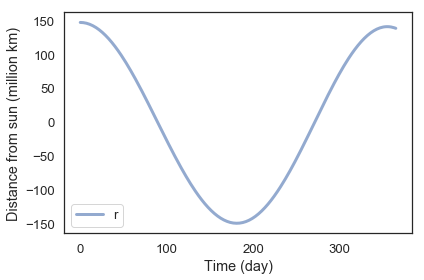

In [18]:
# And plotting

plot(x, label='r')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

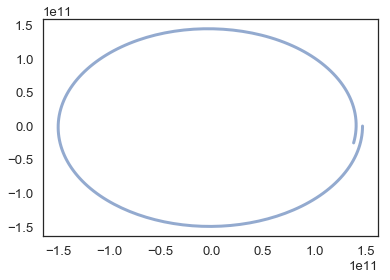

In [19]:
plot(results.x, results.y)

In [20]:
help (solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a one-dimensional independent variable (time), y(t) is an
    n-dimensional vector-valued function (state), and an n-dimensional
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note that
    for stiff ODE solvers, the right-hand side must be complex-differentiable
    (satisfy Cauchy-Riemann equations [11]_). To solve a problem in the complex
    doma

In [23]:
results, details = run_ode_solver(system, slope_func, t_eval=ts, method='RK23')
details

,values
sol,None
t_events,[]
nfev,137
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


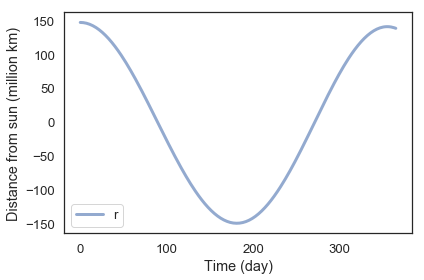

In [24]:
plot(x, label='r')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

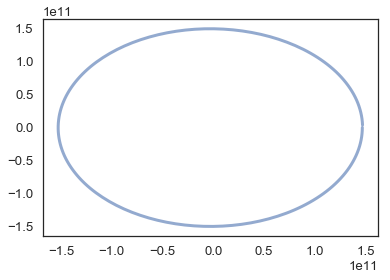

In [25]:
plot(results.x, results.y)

In [22]:
Solution = solve_ivp(slope_func, (0, 31536000), y0 = init, method='RK23', t_eval=ts)

ValueError: setting an array element with a sequence.